In [31]:
from datetime import datetime
import pandas as pd
import acquire
import prepare
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = prepare.prep_store()
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,Tuesday,13.84
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,34.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,1,Tuesday,31.65
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,62.40
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,43.40


# Split the data

<ipython-input-8-65a00336c0ab>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017']


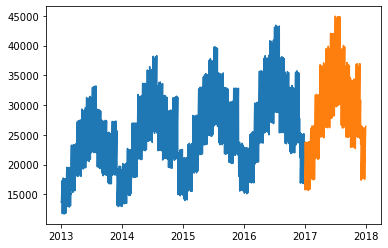

In [8]:
train = df[:'2016'] # includes 2016
test = df['2017']

train_by_date = train.groupby(['sale_date']).sale_amount.sum().reset_index()
#train_by_date.plot(x='sale_date', y='sale_amount')

test_by_date = test.groupby(['sale_date']).sale_amount.sum().reset_index()
#test_by_date.plot(x='sale_date', y='sale_amount')

plt.plot(train_by_date.sale_date, train_by_date.sale_amount)
plt.plot(test_by_date.sale_date, test_by_date.sale_amount)
plt.show()

In [9]:
train.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,Tuesday,13.84
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,34.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,1,Tuesday,31.65
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,62.40
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,43.40


In [13]:
y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00    13.84
2013-01-01 00:00:00+00:00    34.40
2013-01-01 00:00:00+00:00    31.65
2013-01-01 00:00:00+00:00    62.40
2013-01-01 00:00:00+00:00    43.40
Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

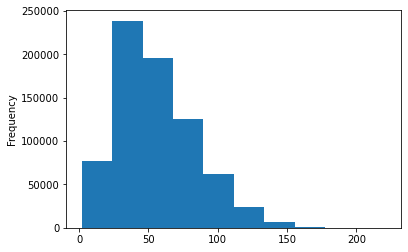

In [14]:
y.plot.hist()

<AxesSubplot:xlabel='sale_date'>

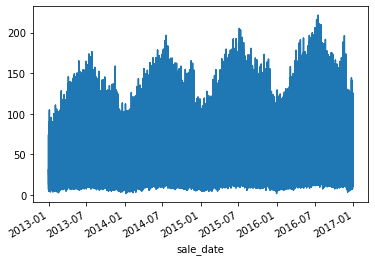

In [16]:
y.plot()

<AxesSubplot:xlabel='sale_date'>

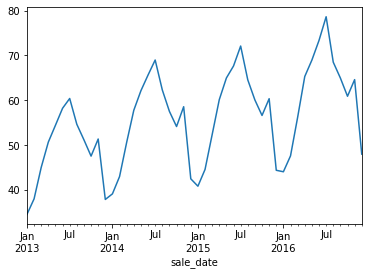

In [15]:
y.resample('M').mean().plot()

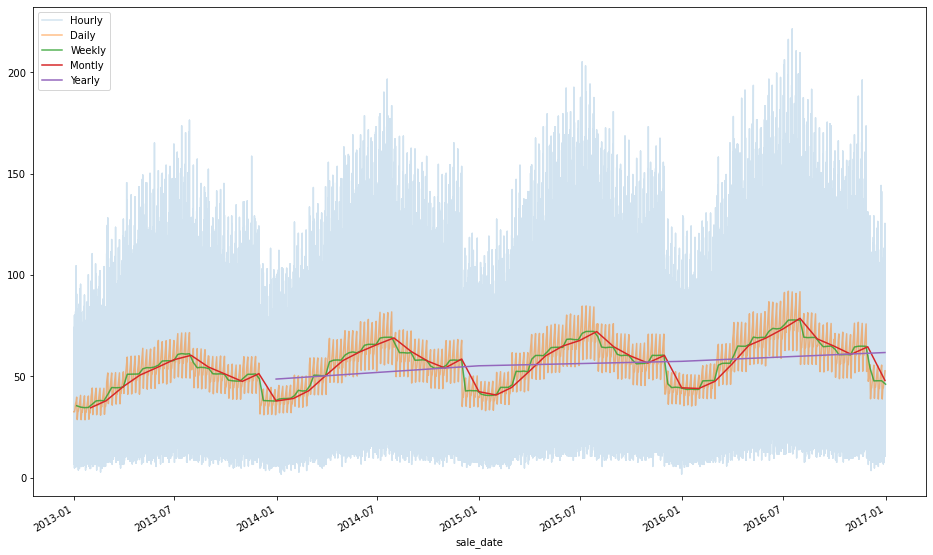

In [19]:
plt.figure(figsize = (16,10))
ax = y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(ax =ax, alpha=.5, label='Daily')
y.resample('W').mean().plot(ax =ax, alpha=.8, label='Weekly')
y.resample('M').mean().plot(ax =ax, label='Montly')
y.resample('Y').mean().plot(ax =ax, label='Yearly')
plt.legend()
plt.show()

### I can use this in the project to see seasonal differences profit volume, growth percentage, sales growth ?

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

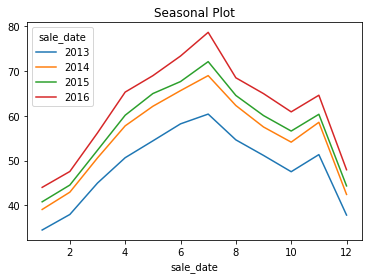

In [21]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


Text(0.5, 1.0, 'Lag plot with lag=1')

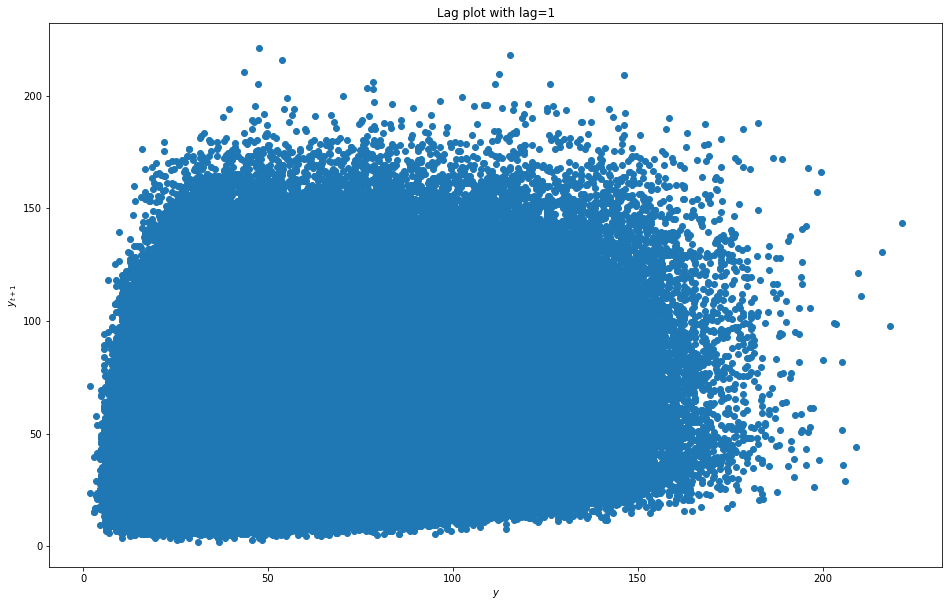

In [23]:
plt.figure(figsize = (16,10))
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

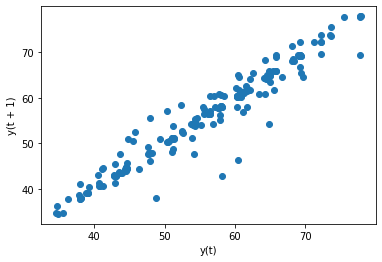

In [25]:
# WIth a lag of 1
pd.plotting.lag_plot(y.resample('W').mean(), lag=1)

<AxesSubplot:xlabel='month', ylabel='sales_total'>

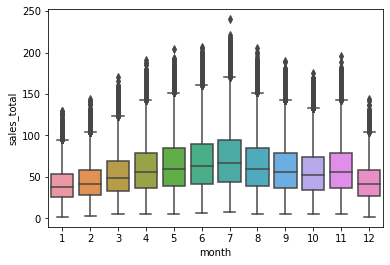

In [24]:
# boxplot for each month
sns.boxplot(data = df, x = 'month', y = 'sales_total')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 12)'>

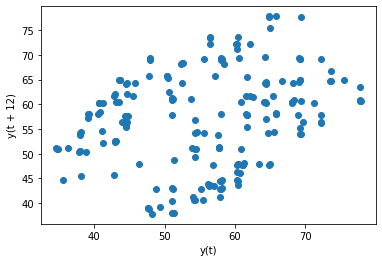

In [26]:
# WIth a lag of 12
pd.plotting.lag_plot(y.resample('W').mean(), lag=12)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

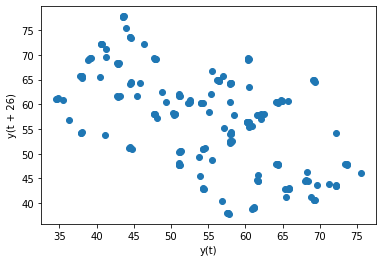

In [27]:
# WIth a lag of 26
pd.plotting.lag_plot(y.resample('W').mean(), lag=26)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

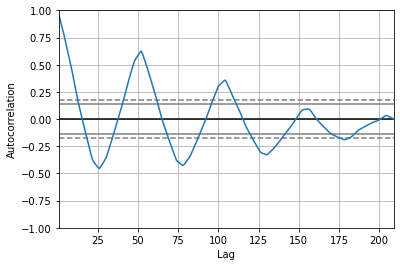

In [28]:
pd.plotting.autocorrelation_plot(y.resample('W').mean())

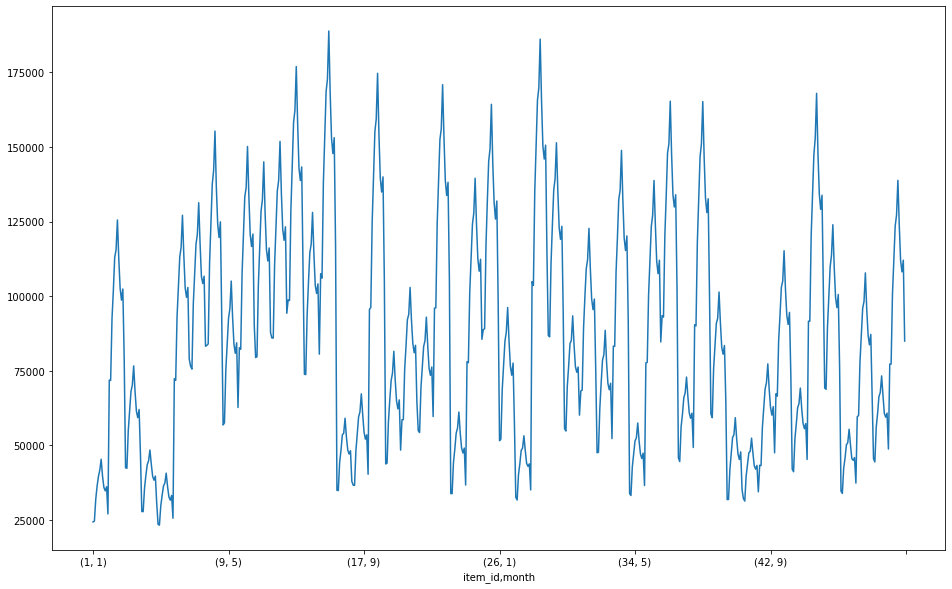

In [29]:
plt.figure(figsize=(16,10))
df.groupby(['item_id', 'month']).sales_total.sum().plot()
plt.show()

In [32]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,35.516067,NaN,-14.406312,NaN
2013-01-13 00:00:00+00:00,34.846686,NaN,-14.747474,NaN
2013-01-20 00:00:00+00:00,34.574686,NaN,-14.840886,NaN
2013-01-27 00:00:00+00:00,34.674114,NaN,-14.931698,NaN
2013-02-03 00:00:00+00:00,36.310971,NaN,-14.412598,NaN


<Figure size 1152x720 with 0 Axes>

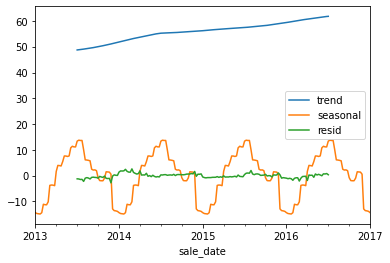

In [34]:
plt.figure(figsize = (16,10))
decomposition.iloc[:, 1:].plot()
plt.show()

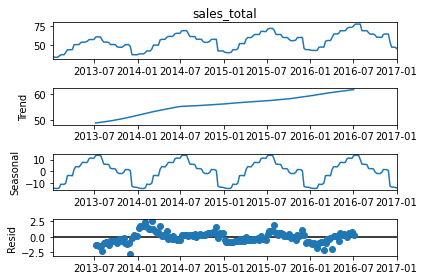

In [37]:
result.plot()
None

In [36]:
train = train.resample('D').sum()
# create a categorical feature
train['sale_bin'] = pd.qcut(train.sales_total, 3, labels=['Lower', 'Mid', 'High'])
train.groupby('sale_bin').mean()

,item,sale_amount,sale_id,store,store_id,item_id,item_price,month,day,sales_total
sale_bin,,,,,,,,,,
Lower,12750.0,18578.123203,2.280741e+08,2750.0,2750.0,12750.0,2580.2,2734.086242,7803.901437,21158.323203
Mid,12750.0,25116.987680,2.281486e+08,2750.0,2750.0,12750.0,2580.2,3536.960986,7891.170431,27697.187680
High,12750.0,32220.232033,2.282543e+08,2750.0,2750.0,12750.0,2580.2,3513.347023,7899.383984,34800.432033


Text(0, 0.5, '% of days in the month')

<Figure size 1152x720 with 0 Axes>

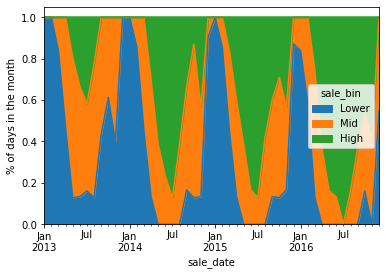

In [40]:
plt.figure(figsize = (16,10))
(train.groupby('sale_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

<ipython-input-43-ee3277a9db9c>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax = (train['2015']


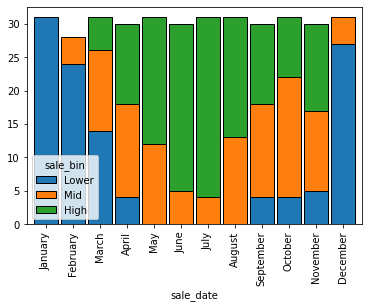

<Figure size 1152x720 with 0 Axes>

In [43]:
ax = (train['2015']
 .groupby('sale_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.figure(figsize=(16,10))
plt.show()